In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded  = files.upload()


Saving Project Management Dataset.csv to Project Management Dataset (1).csv


In [ ]:
df = pd.read_csv('Project Management Dataset.csv')


In [ ]:
print(df.head())

                Project Name  \
0                 Rhinestone   
1     A Triumph Of Softwares   
2              The Blue Bird   
3  Remembering Our Ancestors   
4                   Skyhawks   

                                 Project Description  \
0  Associations Now Is A Casual Game To Teach You...   
1  Is A Fully Managed Content Marketing Software ...   
2  Most Content Marketers Know The Golden Rule: Y...   
3  Utilize And Utilizes (Verb Form) The Open, Inc...   
4  Is A Solution For Founders Who Want To Win At ...   

                  Project Type  Project Manager Region           Department  \
0            INCOME GENERATION      Yael Wilcox  North           Admin & BI   
1            INCOME GENERATION  Brenda Chandler   West            eCommerce   
2            INCOME GENERATION    Nyasia Hunter  North            Warehouse   
3          PROCESS IMPROVEMENT  Brenda Chandler   East  Sales and Marketing   
4  WORKING CAPITAL IMPROVEMENT  Jaylyn Mckenzie   East            eCommerce

In [ ]:
print(df.tail())

           Project Name                                Project Description  \
94      Strive Training  Was Built To Help Founders Create Optimized Co...   
95         Debug Entity  In This Ecosystem, Association Content Is Simp...   
96           Made By Me  With 15 Five, We Take The Guesswork Out Of Con...   
97           Revolution  Was Founded To Help Founders And Entrepreneurs...   
98  7Th Annual Workshop  Welcome To The Future Of Content Creation. The...   

                   Project Type  Project Manager Region           Department  \
94  WORKING CAPITAL IMPROVEMENT    Nyasia Hunter  South         Supply Chain   
95            INCOME GENERATION    Kamari Norris  North            Warehouse   
96          PROCESS IMPROVEMENT      Yael Wilcox   West         Supply Chain   
97               COST REDUCTION  Jaylyn Mckenzie   East            eCommerce   
98  WORKING CAPITAL IMPROVEMENT    Nyasia Hunter   West  Sales and Marketing   

     Project Cost   Project Benefit  Complexity   

In [ ]:
print(df.dtypes)

Project Name           object
Project Description    object
Project Type           object
Project Manager        object
Region                 object
Department             object
 Project Cost          object
 Project Benefit       object
Complexity             object
Status                 object
Completion%            object
Phase                  object
Year                    int64
Month                   int64
Start Date             object
End Date               object
dtype: object


In [ ]:
print(df.isnull().sum())

Project Name           0
Project Description    0
Project Type           0
Project Manager        0
Region                 0
Department             0
 Project Cost          0
 Project Benefit       0
Complexity             0
Status                 0
Completion%            0
Phase                  0
Year                   0
Month                  0
Start Date             0
End Date               0
dtype: int64


In [ ]:
print(df.describe())

              Year      Month
count    99.000000  99.000000
mean   2022.747475   7.151515
std       1.402210   3.211471
min    2021.000000   1.000000
25%    2022.000000   4.500000
50%    2022.000000   7.000000
75%    2024.000000  10.000000
max    2025.000000  12.000000


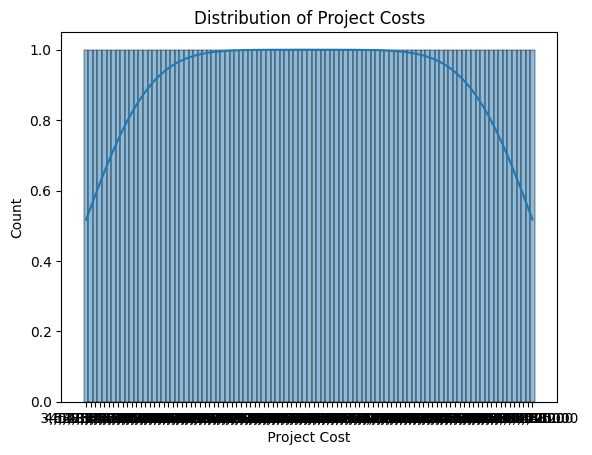

In [ ]:
sns.histplot(data=df, x=' Project Cost ', kde=True)
plt.title('Distribution of Project Costs')
plt.show()

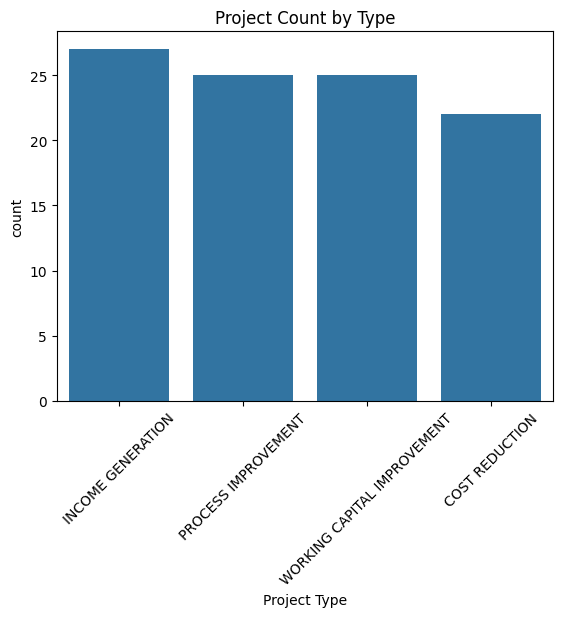

In [ ]:
sns.countplot(data=df, x='Project Type')
plt.xticks(rotation=45)
plt.title('Project Count by Type')
plt.show()

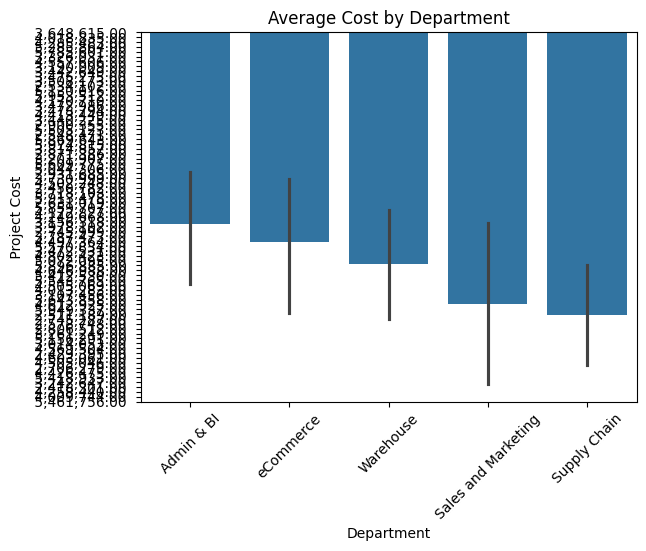

In [ ]:
sns.barplot(data=df, x='Department', y=' Project Cost ', estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Cost by Department')
plt.show()

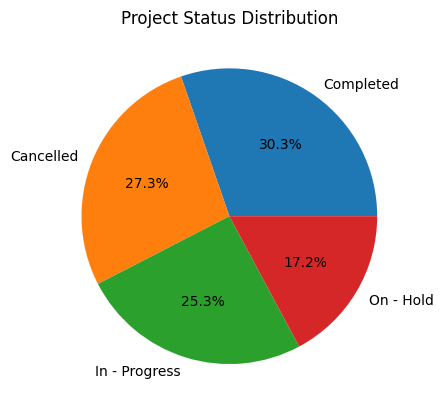

In [ ]:
plt.pie(df['Status'].value_counts(), labels=df['Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Project Status Distribution')
plt.show()


In [ ]:
df.columns

Index(['Project Name', 'Project Description', 'Project Type',
       'Project Manager', 'Region', 'Department', ' Project Cost ',
       ' Project Benefit ', 'Complexity', 'Status', 'Completion%', 'Phase',
       'Year', 'Month', 'Start Date', 'End Date'],
      dtype='object')

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Rhinestone'

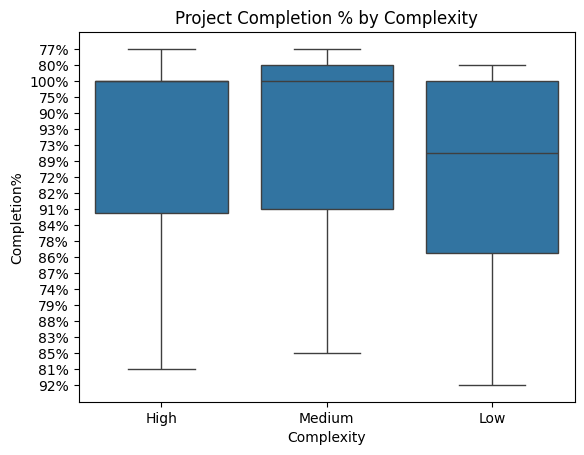

In [ ]:
sns.boxplot(data=df, x='Complexity', y='Completion%', showfliers = False)
plt.title('Project Completion % by Complexity')
plt.show()

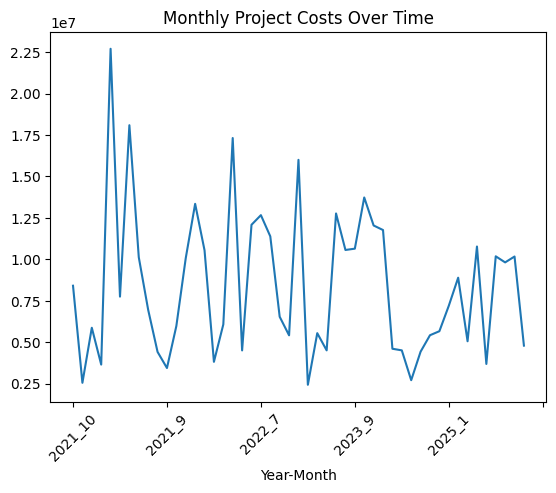

In [ ]:
df['Year-Month']= df['Year'].astype(str) +'_'+df['Month'].astype(str)
df.groupby('Year-Month')[' Project Cost '].sum().plot()
plt.title('Monthly Project Costs Over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df[' Project Benefit '] = df[' Project Benefit '].str.replace(',', '').astype(float)

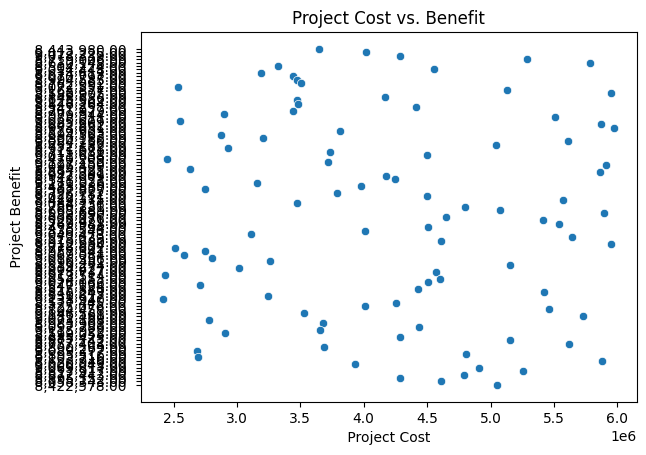

In [ ]:
sns.scatterplot(data=df, x=' Project Cost ', y=' Project Benefit ')
plt.title('Project Cost vs. Benefit')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x=' Project Cost ', y=' Project Benefit ', z='Complexity',
                  color='Project Type')
fig.update_layout(scene = dict(
                    xaxis = dict(title  = 'Project Cost'),
                    yaxis = dict(title  = 'Project Benefit'),
                    zaxis = dict(title  = 'Complexity')))
fig.show()

In [ ]:
# prompt: generate  label encoder for complexity

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the Complexity column
df['Complexity'] = le.fit_transform(df['Complexity'])

# Print the encoded labels
print(le.classes_)


['High' 'Low' 'Medium']


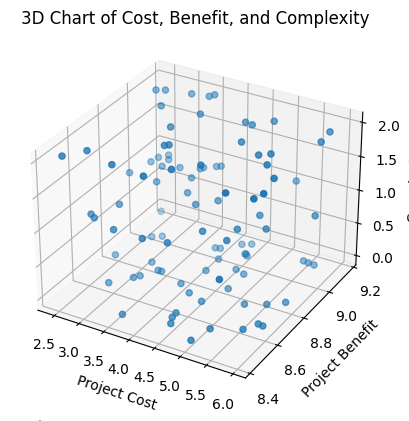

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[' Project Cost '], df[' Project Benefit '], df['Complexity'])
ax.set_xlabel('Project Cost')
ax.set_ylabel('Project Benefit')
ax.set_zlabel('Complexity')
plt.title('3D Chart of Cost, Benefit, and Complexity')
plt.show()